In [8]:
import discoverSTEM as ds
import discoverSTEM.minecraft as mc
from importlib import reload
import matplotlib.pyplot as plt
reload(mc)
import numpy as np

%matplotlib inline

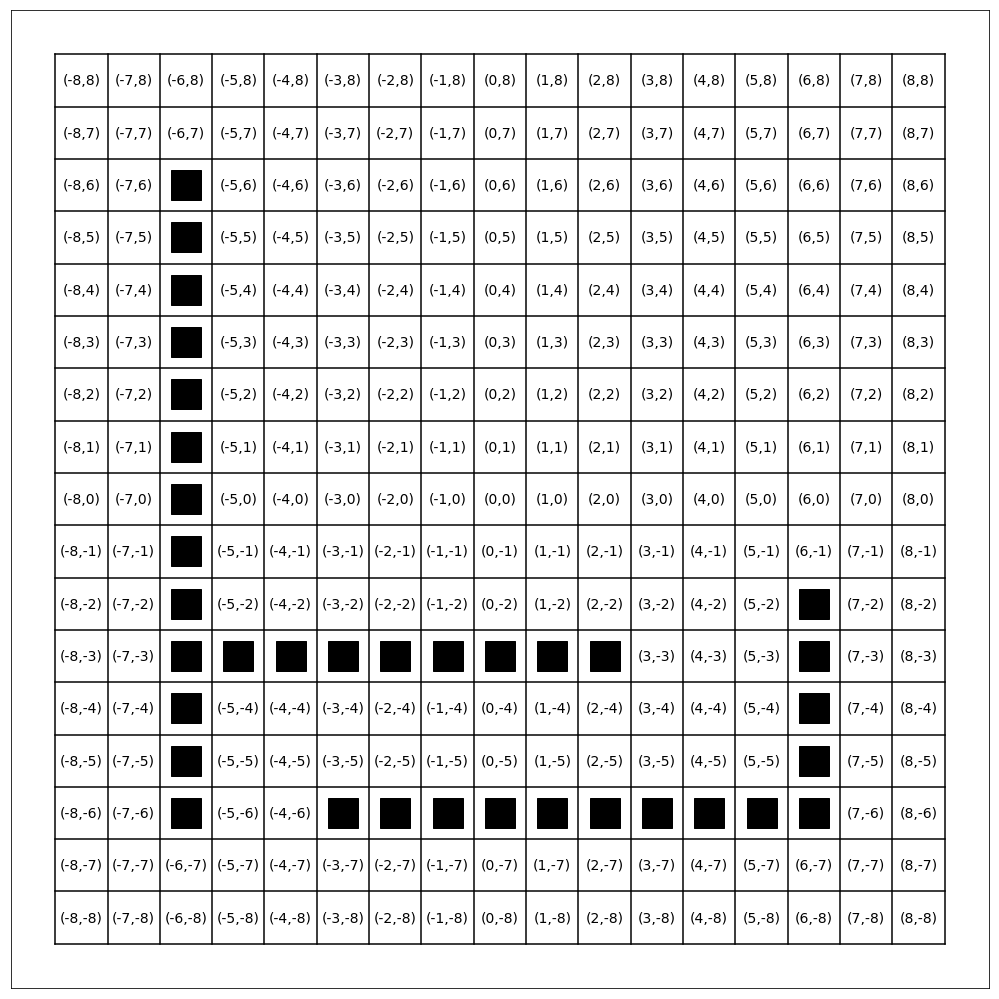

In [9]:
layout = mc.mazeLayout
layout.plot()

In [6]:
def pdRegulator(posErr,velErr):
    return -10 * posErr - 5. * velErr

posTarget = np.array([1,0])
class regulator:
    def __init__(self,Kp,Kd,target):
        self.Kp = Kp
        self.Kd = Kd
        self.target = target
        
    def update(self,pos,vel):
        self.posErr = pos - self.target
        self.velErr = vel
    def value(self):
        return -self.Kp * self.posErr - self.Kd * self.velErr

class way_point_controller:
    def __init__(self,Kp,Kd,way_points,tol=0.1):
        self.way_points = way_points
        self.nW = len(way_points)
        self.wp_num = 0
        self.tol = tol
        self.Kp = Kp
        self.Kd = Kd
    def update(self,pos,vel):
        
        wp = self.way_points[self.wp_num]
        posErr = pos - wp
        if self.wp_num < self.nW - 1:
            
            while (np.linalg.norm(posErr) < self.tol) and (self.wp_num < self.nW - 1):
                self.wp_num += 1
                wp = self.way_points[self.wp_num]
                posErr = pos - wp
        else:
            posErr = pos - self.way_points[-1]
            
        self.posErr = posErr
        self.velErr = vel
        
    def value(self):
        return -self.Kp * self.posErr - self.Kd * self.velErr
        
        
        
    

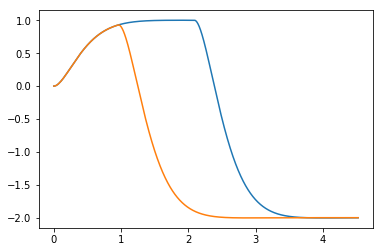

In [7]:
#moveToTarget = regulator(.001,1,np.array([1,1]))
way_points = np.array([[1,1],
                       [1,-2],
                       [-2,-2]])
wpController = way_point_controller(5,7,way_points)
mc.ballSmall(wpController)

In [28]:
mc.ballMaze()